<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/52_C_Datos_A_E_Datos_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Curso Teoría de Probabilidad por Julio Hurtado Márquez**
## **Parte XIII- Análisis Exploratorio de Datos**
# **Librerias para usar en esta parte del curso**

In [ ]:
# **Librerias para usar en esta parte del cursor**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # para visualizacion de datos
%matplotlib inline
import seaborn as sns # para visualizacion de datos
from scipy import stats
import warnings # Para ignorar todas las advertencias
warnings.filterwarnings("ignore", category=FutureWarning)
from sympy.functions.combinatorial.factorials import factorial
import math
from math import sqrt
from numpy.ma.core import log
from sympy import integrate, init_printing
from sympy.abc import x
print("Setup Complete")

Setup Complete


# **220. Parte I: Ejemplo 1.  Análisis de Componentes Princiapales (PCA) y Cluster - Análisis Exploratorio de Datos**

# **a. Base de datos - PCA**

In [ ]:
# **a. Base de datos - PCA**
datos=pd.read_csv("/content/marketing_campaign.csv",sep='\t')
datos

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# **b. Todas las columnas a trabajar y dimension de la data**

In [ ]:
# **b. Todas las columnas a trabajar**
datos.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
# **b. La dimensión de la data**
datos.shape

(2240, 29)

In [ ]:
# **b. Conocemos las dimensiones de las variables**
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# **b. Cambiamos una variable de un formato Object a un formato de fecha**
datos['Dt_Customer']=pd.to_datetime(datos['Dt_Customer'])

<ipython-input-12-a7246cad6a25>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  datos['Dt_Customer']=pd.to_datetime(datos['Dt_Customer'])


In [ ]:
# **b. Chequeamos el cambio realizado**
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

# **c. Veamos si contiene datos perdidos**
+ Tenemos 24 datos perdidos en la variable ingreso

In [ ]:
# **c. Veamos si contiene datos perdidos**
datos.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

# **d. Veamos si contiene datos perdidos - Imputamos**
+ Como en la parte _c_ no se observan todas las variables, sumamos todos los resultado y no tenemos un problema de imputacion de datos

In [ ]:
# **d. IMputamos los datos faltantes con la mediana**
med_inc = datos['Income'].median()
datos['Income'] = datos['Income'].fillna(med_inc)

In [ ]:
# **d. Chequeamos nuevamente si se realizo la imputación**
datos.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [ ]:
# **d. Veamos si contiene datos perdidos**
datos.isnull().sum().sum()

0

# **e. Vamos a crear una nueva variable que llamaremos Edad**
+ A partir de los datos crearemos una nueva variable
+ Fecha de alta del cliente menos la fecha de nacimiento

In [ ]:
# **e. Vamos a crear una nueva variable que llamaremos Edad**
datos['Edad'] = datos['Dt_Customer'].dt.year-datos['Year_Birth']


In [ ]:
# **e. Chequeamos que los datos se encuentren bien**
datos['Edad'].describe() # Notamos que hay un dato atipico

count    2240.000000
mean       44.222321
std        12.022855
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max       121.000000
Name: Edad, dtype: float64

# **f. Imputaremos estos datos anomalos con la mediana**

In [ ]:
med_Edad = datos['Edad'].median()
datos['Edad'] = np.where(datos['Edad']>=100,med_Edad,datos['Edad']) # Donde las Edades sean mayores que 100 impute por la mediana
# del resto dejarlo igual

In [ ]:
# **f. Chequeamos si se hizo el cambio**
datos['Edad'].describe()

count    2240.000000
mean       44.124554
std        11.731214
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max        73.000000
Name: Edad, dtype: float64

# **g. Vamos a contruir nuestra data eliminando las variables que no necesitamos**

In [ ]:
datos['Z_CostContact'].unique()

array([3])

In [ ]:
datos['Z_CostContact'].describe()

count    2240.0
mean        3.0
std         0.0
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: Z_CostContact, dtype: float64

In [ ]:
datos.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Edad
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,44.124554
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.731214
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,16.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,36.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,43.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,54.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,73.000000


In [ ]:
lista_variables = set(datos.columns)-set(['ID', 'Year_Birth', 'Dt_Customer','Z_CostContact','Z_Revenue',
                                           'Marital_Status', 'Education','Complain','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                                          'AcceptedCmp1',       'AcceptedCmp2',    'Response'])

# **h. Construimos nuestro nuevo DataFrame**

In [ ]:
datos_train =datos[lista_variables].copy()
datos_train

,NumDealsPurchases,NumWebVisitsMonth,MntFruits,Kidhome,MntFishProducts,NumCatalogPurchases,NumStorePurchases,Edad,MntSweetProducts,Recency,MntGoldProds,MntMeatProducts,MntWines,Income,Teenhome,NumWebPurchases
0,3,7,88,0,172,10,4,55.0,88,58,88,546,635,58138.0,0,8
1,2,5,1,1,2,1,2,60.0,1,38,6,6,11,46344.0,1,1
2,1,4,49,0,111,2,10,48.0,21,26,42,127,426,71613.0,0,8
3,2,6,4,1,10,0,4,30.0,3,26,5,20,11,26646.0,0,2
4,5,5,43,1,46,3,6,33.0,27,94,15,118,173,58293.0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,5,43,0,42,3,4,46.0,118,46,247,182,709,61223.0,1,9
2236,7,7,0,2,0,2,5,68.0,0,56,8,30,406,64014.0,1,8
2237,1,6,48,0,32,3,13,33.0,12,91,24,217,908,56981.0,0,2
2238,2,3,30,0,80,5,10,58.0,30,8,61,214,428,69245.0,1,6


In [ ]:
# **h. Revisando nuestro Data Frame
datos_train.describe()

,NumDealsPurchases,NumWebVisitsMonth,MntFruits,Kidhome,MntFishProducts,NumCatalogPurchases,NumStorePurchases,Edad,MntSweetProducts,Recency,MntGoldProds,MntMeatProducts,MntWines,Income,Teenhome,NumWebPurchases
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,2.325000,5.316518,26.302232,0.444196,37.525446,2.662054,5.790179,44.124554,27.062946,49.109375,44.021875,166.950000,303.935714,52237.975446,0.506250,4.084821
std,1.932238,2.426645,39.773434,0.538398,54.628979,2.923101,3.250958,11.731214,41.280498,28.962453,52.167439,225.715373,336.597393,25037.955891,0.544538,2.778714
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1730.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000,0.000000,3.000000,0.000000,3.000000,36.000000,1.000000,24.000000,9.000000,16.000000,23.750000,35538.750000,0.000000,2.000000
50%,2.000000,6.000000,8.000000,0.000000,12.000000,2.000000,5.000000,43.000000,8.000000,49.000000,24.000000,67.000000,173.500000,51381.500000,0.000000,4.000000
75%,3.000000,7.000000,33.000000,1.000000,50.000000,4.000000,8.000000,54.000000,33.000000,74.000000,56.000000,232.000000,504.250000,68289.750000,1.000000,6.000000
max,15.000000,20.000000,199.000000,2.000000,259.000000,28.000000,13.000000,73.000000,263.000000,99.000000,362.000000,1725.000000,1493.000000,666666.000000,2.000000,27.000000


# **i. Recomponiendo la base de datos**

In [ ]:
datos_train.columns # Existen unas variables que son de gastos y otras de compra
# purchase : Compra
# Spend : Gastos

Index(['NumDealsPurchases', 'NumWebVisitsMonth', 'MntFruits', 'Kidhome',
       'MntFishProducts', 'NumCatalogPurchases', 'NumStorePurchases', 'Edad',
       'MntSweetProducts', 'Recency', 'MntGoldProds', 'MntMeatProducts',
       'MntWines', 'Income', 'Teenhome', 'NumWebPurchases'],
      dtype='object')

In [ ]:
# **i. Localizamos las varriables que son costos y gastos en el DataFrame**
lista_variables_Spend = [a for a in datos_train.columns if a.startswith('Mnt')]
lista_variables_Purchases = [a for a in datos_train.columns if a.endswith('Purchases')]

In [ ]:
# **i. Construimos unas nuevas variables en el DataFrame que sume estos costos y estos gastos y a la vez el numero de hijos**
datos_train['Spend_Total'] = datos_train[lista_variables_Spend].sum(axis = 1)
datos_train['Purchases_Total'] = datos_train[lista_variables_Purchases].sum(axis = 1)
datos_train['Hijos_Total'] = datos_train['Kidhome'] + datos_train['Teenhome']
datos_train

,NumDealsPurchases,NumWebVisitsMonth,MntFruits,Kidhome,MntFishProducts,NumCatalogPurchases,NumStorePurchases,Edad,MntSweetProducts,Recency,MntGoldProds,MntMeatProducts,MntWines,Income,Teenhome,NumWebPurchases,Spend_Total,Purchases_Total,Hijos_Total
0,3,7,88,0,172,10,4,55.0,88,58,88,546,635,58138.0,0,8,1617,25,0
1,2,5,1,1,2,1,2,60.0,1,38,6,6,11,46344.0,1,1,27,6,2
2,1,4,49,0,111,2,10,48.0,21,26,42,127,426,71613.0,0,8,776,21,0
3,2,6,4,1,10,0,4,30.0,3,26,5,20,11,26646.0,0,2,53,8,1
4,5,5,43,1,46,3,6,33.0,27,94,15,118,173,58293.0,0,5,422,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,5,43,0,42,3,4,46.0,118,46,247,182,709,61223.0,1,9,1341,18,1
2236,7,7,0,2,0,2,5,68.0,0,56,8,30,406,64014.0,1,8,444,22,3
2237,1,6,48,0,32,3,13,33.0,12,91,24,217,908,56981.0,0,2,1241,19,0
2238,2,3,30,0,80,5,10,58.0,30,8,61,214,428,69245.0,1,6,843,23,1


# **j. Graficos de Boxplot para cada variable**

In [ ]:
# **j. Graficos de Boxplot para cada variable**
def graficos_boxplot(data,lista,fila,columna,top=1.9,hspace=0.7): #top=1.9,hspace=0.7 para que no se junten los graficos
  plt.figure(figsize=(15,6))
  plt.subplots_adjust(top=top,hspace=hspace)
  for i,j in enumerate(sorted(lista)):
    plt.subplot(fila,columna,i+1)
    sns.boxplot(data[j])
    plt.title(f'{j}')
    plt.xlabel('')


In [ ]:
# **j. REorganizando mi nueva lista de variables**
lista_variables_num = set(datos_train.columns)-set(['Kidhome', 'Teenhome'])
len(lista_variables_num)

17

In [ ]:
datos_train2 =datos_train[lista_variables_num].copy()
datos_train2

,NumWebVisitsMonth,MntFishProducts,NumCatalogPurchases,Edad,Hijos_Total,Income,MntMeatProducts,NumDealsPurchases,Spend_Total,MntFruits,MntSweetProducts,NumStorePurchases,Purchases_Total,MntGoldProds,Recency,MntWines,NumWebPurchases
0,7,172,10,55.0,0,58138.0,546,3,1617,88,88,4,25,88,58,635,8
1,5,2,1,60.0,2,46344.0,6,2,27,1,1,2,6,6,38,11,1
2,4,111,2,48.0,0,71613.0,127,1,776,49,21,10,21,42,26,426,8
3,6,10,0,30.0,1,26646.0,20,2,53,4,3,4,8,5,26,11,2
4,5,46,3,33.0,1,58293.0,118,5,422,43,27,6,19,15,94,173,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,5,42,3,46.0,1,61223.0,182,2,1341,43,118,4,18,247,46,709,9
2236,7,0,2,68.0,3,64014.0,30,7,444,0,0,5,22,8,56,406,8
2237,6,32,3,33.0,0,56981.0,217,1,1241,48,12,13,19,24,91,908,2
2238,3,80,5,58.0,1,69245.0,214,2,843,30,30,10,23,61,8,428,6


# **k. Construyendo los boxplots**

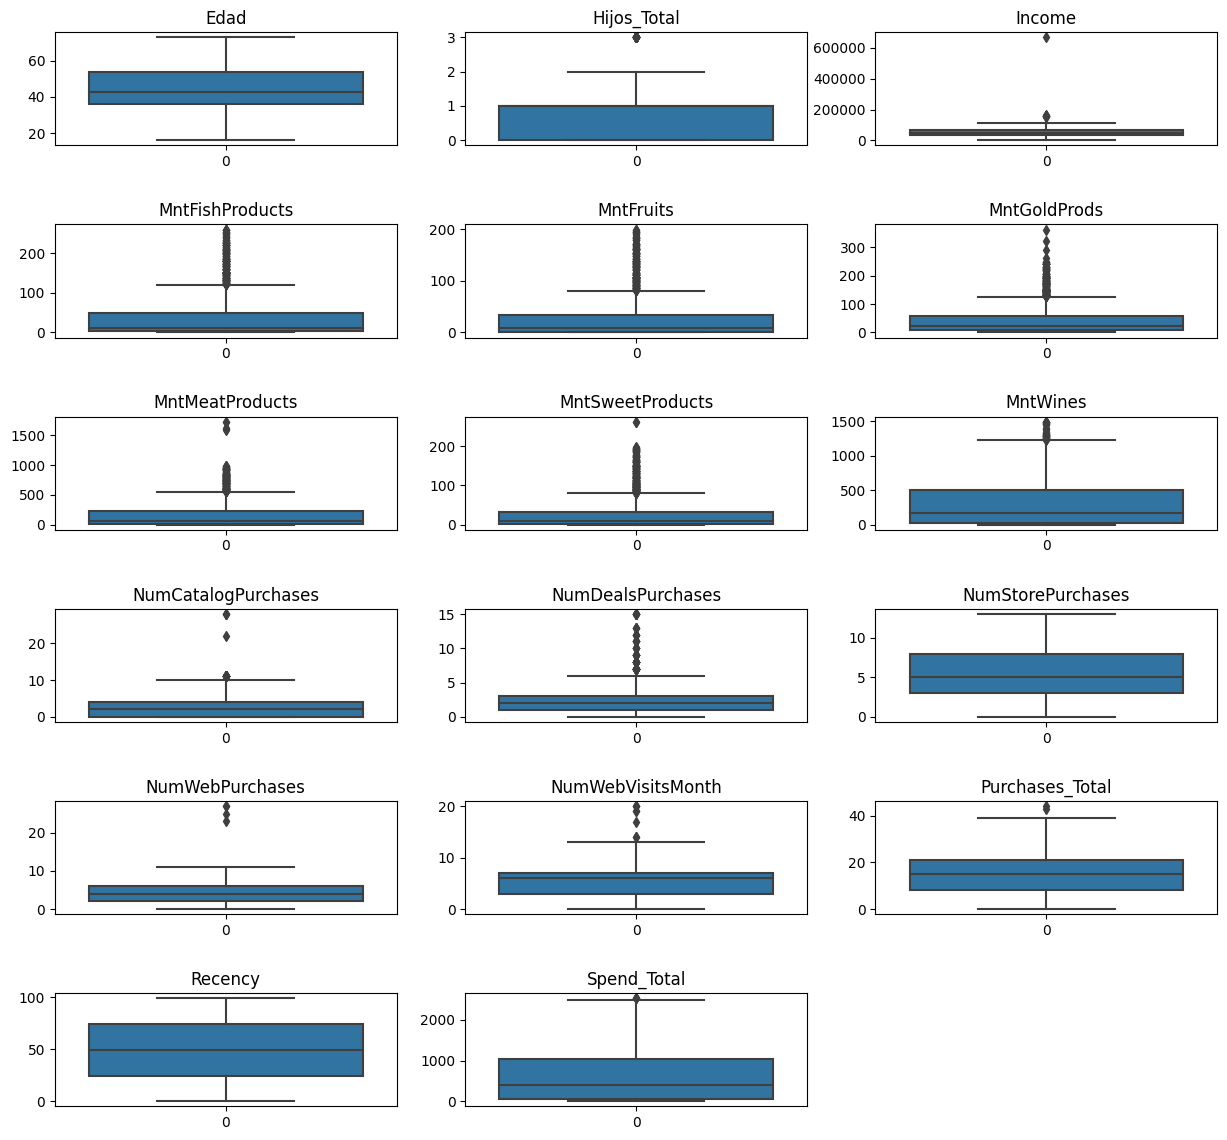

In [ ]:
graficos_boxplot(datos_train,lista_variables_num,6,3)

# **l. Preguntemonos si hay correlación entre las variables**

In [ ]:
# **e. Preguntemonos si hay correlación entre las variables**
datos_train2.corr()

,NumWebVisitsMonth,MntFishProducts,NumCatalogPurchases,Edad,Hijos_Total,Income,MntMeatProducts,NumDealsPurchases,Spend_Total,MntFruits,MntSweetProducts,NumStorePurchases,Purchases_Total,MntGoldProds,Recency,MntWines,NumWebPurchases
NumWebVisitsMonth,1.000000,-0.446003,-0.520364,-0.131542,0.418419,-0.549785,-0.539470,0.347633,-0.500218,-0.418383,-0.423294,-0.428473,-0.312288,-0.250719,-0.021445,-0.320653,-0.055846
MntFishProducts,-0.446003,1.000000,0.534478,0.038437,-0.425503,0.437564,0.568402,-0.139361,0.642818,0.594804,0.579870,0.459855,0.469454,0.422875,0.001079,0.399753,0.293681
NumCatalogPurchases,-0.520364,0.534478,1.000000,0.120037,-0.439904,0.586826,0.723827,-0.008617,0.778577,0.487917,0.490924,0.518738,0.735198,0.437697,0.025110,0.635226,0.378376
Edad,-0.131542,0.038437,0.120037,1.000000,0.097069,0.163013,0.026002,0.057009,0.104963,0.010410,0.015259,0.133417,0.168592,0.048872,0.018087,0.153452,0.143785
Hijos_Total,0.418419,-0.425503,-0.439904,0.097069,1.000000,-0.290858,-0.502208,0.439684,-0.498888,-0.394853,-0.383137,-0.321125,-0.245790,-0.266095,0.018053,-0.351909,-0.146361
Income,-0.549785,0.437564,0.586826,0.163013,-0.290858,1.000000,0.577805,-0.082315,0.664775,0.428791,0.436131,0.526600,0.563450,0.321938,-0.004061,0.576903,0.380554
MntMeatProducts,-0.539470,0.568402,0.723827,0.026002,-0.502208,0.577805,1.000000,-0.122415,0.842965,0.543105,0.523846,0.479659,0.554229,0.350609,0.023056,0.562667,0.293761
NumDealsPurchases,0.347633,-0.139361,-0.008617,0.057009,0.439684,-0.082315,-0.122415,1.000000,-0.065112,-0.132114,-0.120100,0.068879,0.362334,0.049085,-0.001098,0.010940,0.234185
Spend_Total,-0.500218,0.642818,0.778577,0.104963,-0.498888,0.664775,0.842965,-0.065112,1.000000,0.614229,0.603016,0.674669,0.753903,0.524262,0.020433,0.891839,0.519837
MntFruits,-0.418383,0.594804,0.487917,0.010410,-0.394853,0.428791,0.543105,-0.132114,0.614229,1.000000,0.567164,0.461758,0.455461,0.392995,-0.004306,0.389637,0.296735


# **m. Triangulo de correlación y mapa de calor - Heatmap**
+ **La evidencia de una fuerte correlacion entre las variables es un indicio de que hay que usar el métodos de componentes principales**

<ipython-input-42-3f62d879e53b>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(datos_train2.corr(), dtype=np.bool))


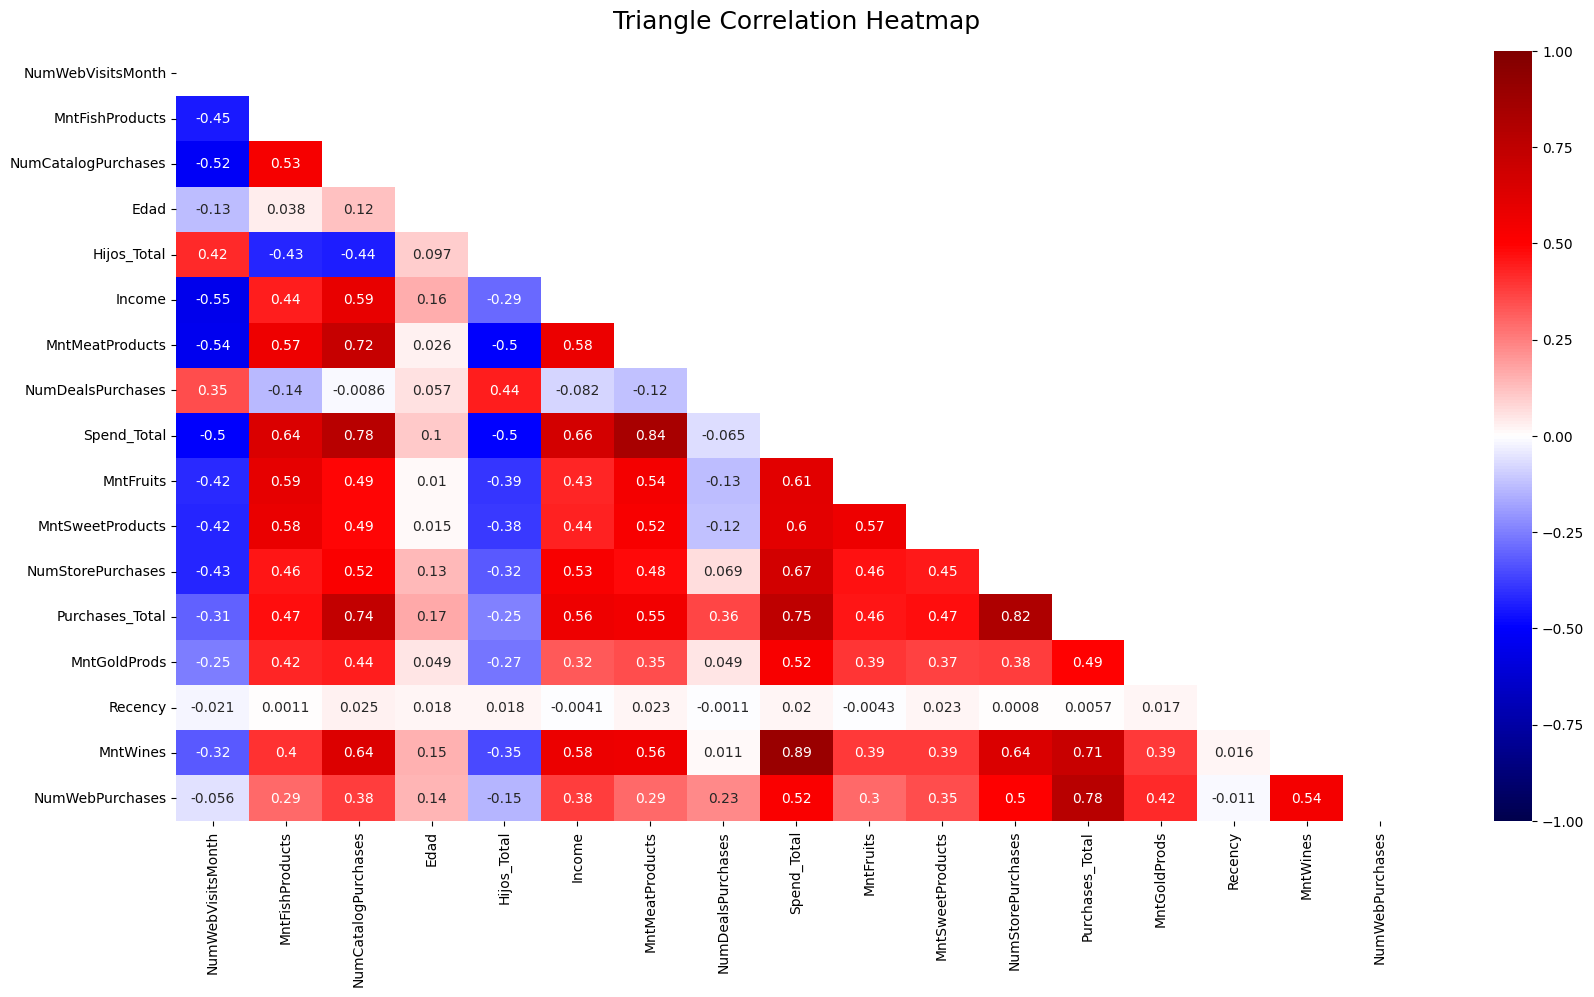

In [ ]:
# **f. Triangulo de correlación y mapa de calor - Heatmap**
plt.figure(figsize=(20,10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(datos_train2.corr(), dtype=np.bool))
heatmap = sns.heatmap(datos_train2.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='seismic')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.show()

# **221. Parte II Ejemplo 1.  Análisis de Componentes Princiapales (PCA) y Cluster - Análisis Exploratorio de Datos**

# **a. Limpieza y Transformación de los datos Método de Percentil**
+ Limpieza del percentil superior 97%
+ Limpieza del percentil inferior 3%
+ De los diagramas de caja se descartan las que se encuentran bien

In [ ]:
# **a. Creamos la función para hacer la limpieza**
def atipicos(x,qmax,qmin):
  xmod = x.copy()
  quanSuperior = xmod.quantile(qmax)
  quanInferior = xmod.quantile(qmin)

  xmod[xmod>quanSuperior] = quanSuperior
  xmod[xmod<quanInferior] = quanInferior
  return xmod

In [ ]:
# **a. Recordemos cuales son nuestras variables**
datos_train2.columns

Index(['NumWebVisitsMonth', 'MntFishProducts', 'NumCatalogPurchases', 'Edad',
       'Hijos_Total', 'Income', 'MntMeatProducts', 'NumDealsPurchases',
       'Spend_Total', 'MntFruits', 'MntSweetProducts', 'NumStorePurchases',
       'Purchases_Total', 'MntGoldProds', 'Recency', 'MntWines',
       'NumWebPurchases'],
      dtype='object')

In [ ]:
# **Las variables que presentan y no datos atipicos**
lista_variables_limpias = ['Edad', 'Recency', 'NumStorePurchases','Hijos_Total',
                           'Spend_Total','Purchases_Total']
lista_variables_Tratar = [a for a in lista_variables_num if a not in lista_variables_limpias]

In [ ]:
# **La data a limpiar**
len(lista_variables_Tratar) # De variables a tratar

11

# **b. Renombramos nuevamente nuestra base de datos**

+ Construios un nuevo DataFrame que contenga las variables limpias y que agrege aquellas variables que son modificadas por el metodo del percentil.


In [ ]:
datos_train_mod = datos_train2[lista_variables_limpias].copy() # Este es el nuevo dataFrame que vamos a usar
for i in lista_variables_Tratar:
  datos_train_mod[f'{i}_mod'] = atipicos(datos_train2[i],0.97,0.03) #Se van almacenar las variables mofificadas

In [ ]:
# **b. Estamos revisando nuestra base de datos modificadas**
datos_train_mod

,Edad,Recency,NumStorePurchases,Hijos_Total,Spend_Total,Purchases_Total,NumWebVisitsMonth_mod,MntFishProducts_mod,NumCatalogPurchases_mod,Income_mod,MntMeatProducts_mod,NumDealsPurchases_mod,MntFruits_mod,MntSweetProducts_mod,MntGoldProds_mod,MntWines_mod,NumWebPurchases_mod
0,55.0,58,4,0,1617,25,7,172.0,10,58138.0,546.0,3,88,88.0,88,635,8
1,60.0,38,2,2,27,6,5,2.0,1,46344.0,6.0,2,1,1.0,6,11,1
2,48.0,26,10,0,776,21,4,111.0,2,71613.0,127.0,1,49,21.0,42,426,8
3,30.0,26,4,1,53,8,6,10.0,0,26646.0,20.0,2,4,3.0,5,11,2
4,33.0,94,6,1,422,19,5,46.0,3,58293.0,118.0,5,43,27.0,15,173,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,46.0,46,4,1,1341,18,5,42.0,3,61223.0,182.0,2,43,118.0,187,709,9
2236,68.0,56,5,3,444,22,7,0.0,2,64014.0,30.0,7,0,0.0,8,406,8
2237,33.0,91,13,0,1241,19,6,32.0,3,56981.0,217.0,1,48,12.0,24,908,2
2238,58.0,8,10,1,843,23,3,80.0,5,69245.0,214.0,2,30,30.0,61,428,6


# **c. Vemos nuevamente los graficos**

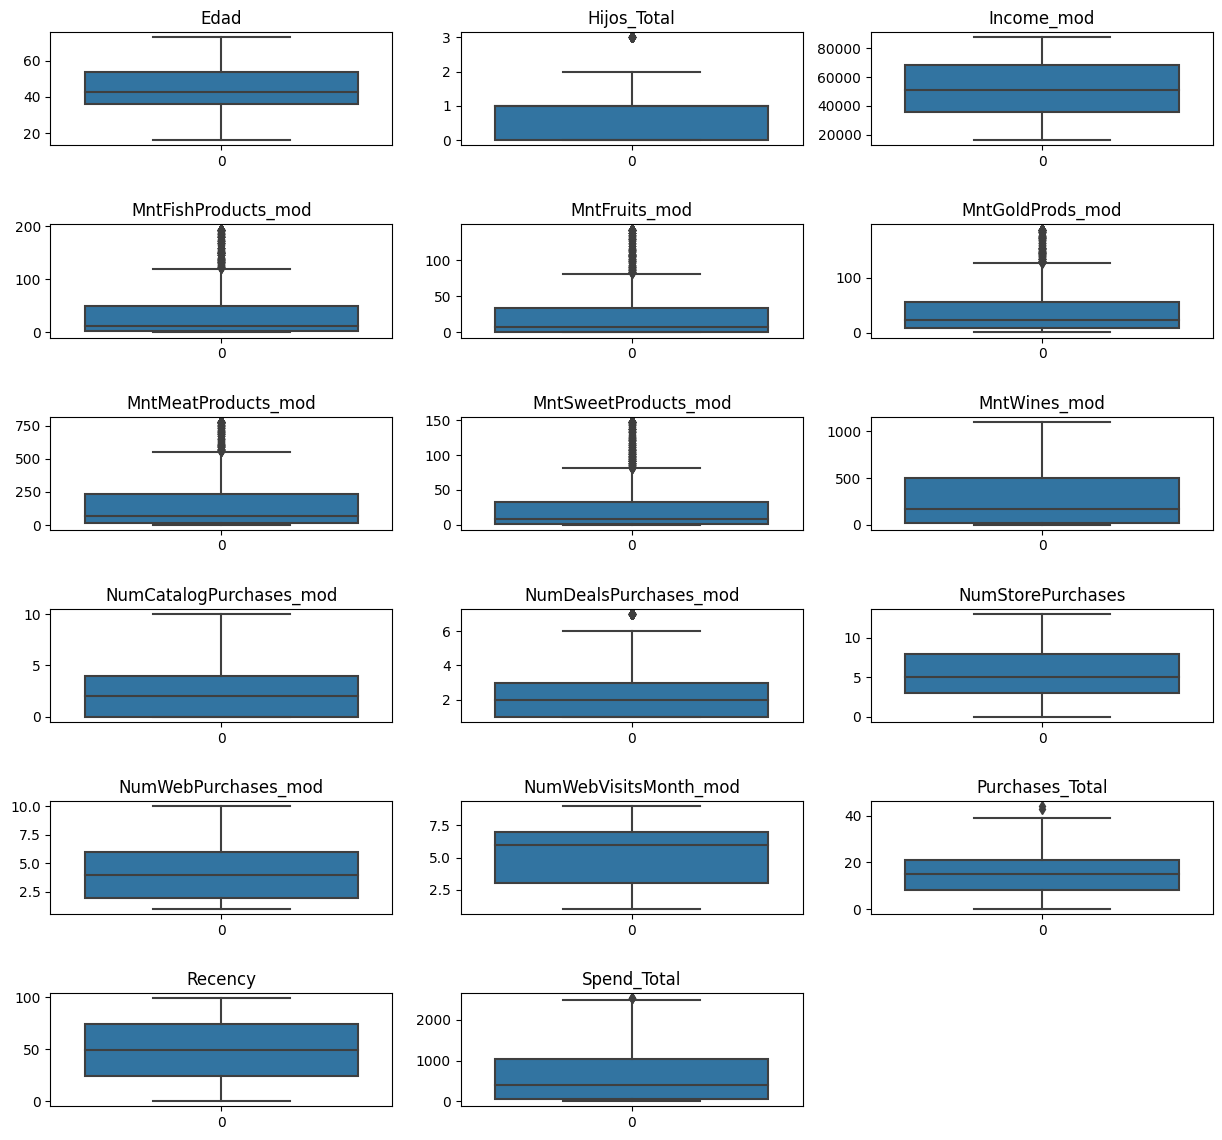

In [ ]:
# **c. Vemos nuevamente los graficos**
graficos_boxplot(datos_train_mod,set(datos_train_mod.columns),6,3)

# **d. Dado que permanece aun variables con los mismos problemas vamos hacer una transformación de estos datos - Transformación Logaritmica**

In [ ]:
# **d. nuestras variables a transformar**
datos_train_mod.columns

Index(['Edad', 'Recency', 'NumStorePurchases', 'Hijos_Total', 'Spend_Total',
       'Purchases_Total', 'NumWebVisitsMonth_mod', 'MntFishProducts_mod',
       'NumCatalogPurchases_mod', 'Income_mod', 'MntMeatProducts_mod',
       'NumDealsPurchases_mod', 'MntFruits_mod', 'MntSweetProducts_mod',
       'MntGoldProds_mod', 'MntWines_mod', 'NumWebPurchases_mod'],
      dtype='object')

In [ ]:
# **d. Creamos la lista de variables a transformar**
Lista_Transformar = ['MntFishProducts_mod','MntGoldProds_mod','MntMeatProducts_mod',
                     'MntSweetProducts_mod','MntFruits_mod']

In [ ]:
datos_LOG_mod = datos_train_mod[Lista_Transformar].apply(np.log1p).rename(columns = lambda x: 'log_'+x)
datos_LOG_mod

,log_MntFishProducts_mod,log_MntGoldProds_mod,log_MntMeatProducts_mod,log_MntSweetProducts_mod,log_MntFruits_mod
0,5.153292,4.488636,6.304449,4.488636,4.488636
1,1.098612,1.945910,1.945910,0.693147,0.693147
2,4.718499,3.761200,4.852030,3.091042,3.912023
3,2.397895,1.791759,3.044522,1.386294,1.609438
4,3.850148,2.772589,4.779123,3.332205,3.784190
...,...,...,...,...,...
2235,3.761200,5.236442,5.209486,4.779123,3.784190
2236,0.000000,2.197225,3.433987,0.000000,0.000000
2237,3.496508,3.218876,5.384495,2.564949,3.891820
2238,4.394449,4.127134,5.370638,3.433987,3.433987


# **e. Renombramos ahora nuestro DataFrame**


In [ ]:
# **e. Renombramos ahora nuestro DataFrame**
datos_TRANSFORMADOS = pd.concat([datos_train_mod.drop(Lista_Transformar,axis=1),datos_LOG_mod],axis=1)
datos_TRANSFORMADOS

,Edad,Recency,NumStorePurchases,Hijos_Total,Spend_Total,Purchases_Total,NumWebVisitsMonth_mod,NumCatalogPurchases_mod,Income_mod,NumDealsPurchases_mod,MntWines_mod,NumWebPurchases_mod,log_MntFishProducts_mod,log_MntGoldProds_mod,log_MntMeatProducts_mod,log_MntSweetProducts_mod,log_MntFruits_mod
0,55.0,58,4,0,1617,25,7,10,58138.0,3,635,8,5.153292,4.488636,6.304449,4.488636,4.488636
1,60.0,38,2,2,27,6,5,1,46344.0,2,11,1,1.098612,1.945910,1.945910,0.693147,0.693147
2,48.0,26,10,0,776,21,4,2,71613.0,1,426,8,4.718499,3.761200,4.852030,3.091042,3.912023
3,30.0,26,4,1,53,8,6,0,26646.0,2,11,2,2.397895,1.791759,3.044522,1.386294,1.609438
4,33.0,94,6,1,422,19,5,3,58293.0,5,173,5,3.850148,2.772589,4.779123,3.332205,3.784190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,46.0,46,4,1,1341,18,5,3,61223.0,2,709,9,3.761200,5.236442,5.209486,4.779123,3.784190
2236,68.0,56,5,3,444,22,7,2,64014.0,7,406,8,0.000000,2.197225,3.433987,0.000000,0.000000
2237,33.0,91,13,0,1241,19,6,3,56981.0,1,908,2,3.496508,3.218876,5.384495,2.564949,3.891820
2238,58.0,8,10,1,843,23,3,5,69245.0,2,428,6,4.394449,4.127134,5.370638,3.433987,3.433987


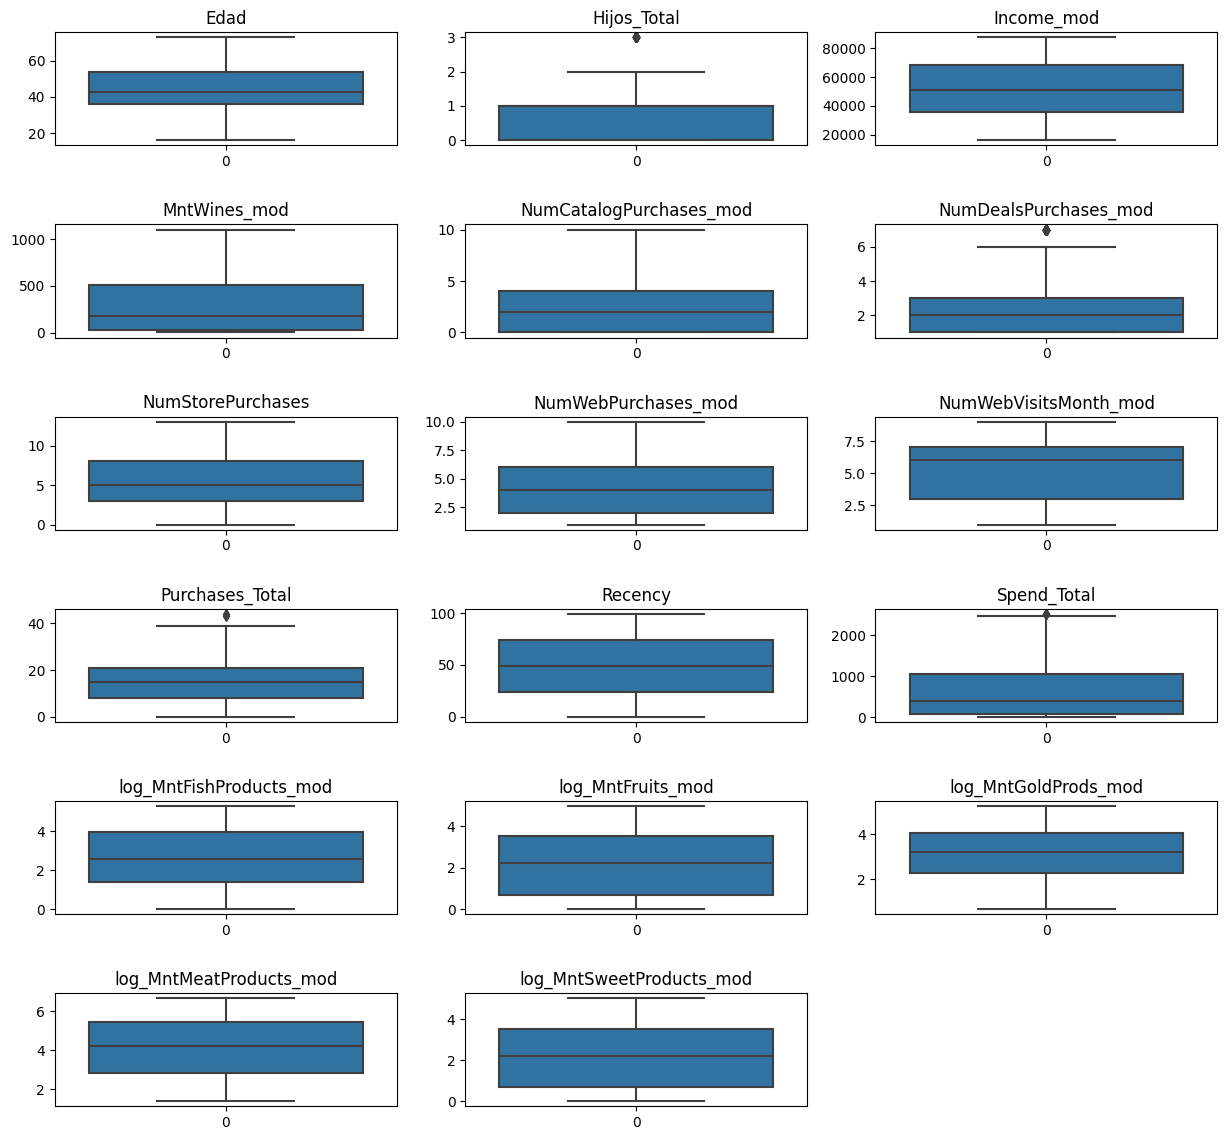

In [ ]:
# **e. Renombramos ahora nuestro DataFrame y hacemos el grafico co las variables transformadas**
graficos_boxplot(datos_TRANSFORMADOS,set(datos_TRANSFORMADOS.columns),6,3)

# **223. Parte III Ejemplo 1. Reduccion de la Dimensión -  Análisis de Componentes Princiapales (PCA) y Cluster - Análisis Exploratorio de Datos**

# **a. Matriz de Covarianza**

In [ ]:
datos_TRANSFORMADOS.cov()

,Edad,Recency,NumStorePurchases,Hijos_Total,Spend_Total,Purchases_Total,NumWebVisitsMonth_mod,NumCatalogPurchases_mod,Income_mod,NumDealsPurchases_mod,MntWines_mod,NumWebPurchases_mod,log_MntFishProducts_mod,log_MntGoldProds_mod,log_MntMeatProducts_mod,log_MntSweetProducts_mod,log_MntFruits_mod
Edad,137.621371,6.145370,5.088227,0.856108,7.415741e+02,15.183782,-3.733793,4.348314,4.961219e+04,1.289147,5.917000e+02,4.529002,0.326166,0.750616,1.856697,-0.190448,0.296196
Recency,6.145370,838.823673,0.075215,0.393095,3.563981e+02,1.276372,-1.439133,2.389055,3.779218e+03,0.258479,1.630288e+02,-0.464737,0.783010,0.731561,1.236194,1.079872,1.114204
NumStorePurchases,5.088227,0.075215,10.568729,-0.784855,1.320925e+03,20.472160,-3.195308,5.084114,4.378221e+04,0.413595,6.943876e+02,4.563603,2.832539,1.964428,3.563590,2.807231,2.745094
Hijos_Total,0.856108,0.393095,-0.784855,0.565207,-2.258827e+02,-1.418630,0.764097,-0.945835,-5.305446e+03,0.575023,-8.682147e+01,-0.303443,-0.588860,-0.292211,-0.542400,-0.535797,-0.536143
Spend_Total,741.574050,356.398141,1320.925485,-225.882715,3.627042e+05,3485.725167,-711.334280,1331.355112,9.921772e+06,-80.547075,1.747219e+05,854.145528,638.774170,429.242017,809.748142,604.087861,605.885898
Purchases_Total,15.183782,1.276372,20.472160,-1.418630,3.485725e+03,58.938979,-5.533023,15.734636,1.071469e+05,4.419758,1.814018e+03,15.864827,6.967243,5.726786,9.450261,6.836106,6.636454
NumWebVisitsMonth_mod,-3.733793,-1.439133,-3.195308,0.764097,-7.113343e+02,-5.533023,5.272889,-3.430405,-3.007536e+04,1.354058,-2.503381e+02,-0.172898,-1.770445,-0.742791,-1.798667,-1.673293,-1.635818
NumCatalogPurchases_mod,4.348314,2.389055,5.084114,-0.945835,1.331355e+03,15.734636,-3.430405,7.479008,4.011413e+04,-0.321048,6.156237e+02,3.179988,2.699848,1.804497,3.247971,2.517983,2.469121
Income_mod,49612.185264,3779.217733,43782.209382,-5305.445536,9.921772e+06,107146.907497,-30075.362841,40114.134361,4.034096e+08,-3942.760679,4.767581e+06,26491.219878,18298.824255,11956.498408,24910.268129,17805.510663,17944.709478
NumDealsPurchases_mod,1.289147,0.258479,0.413595,0.575023,-8.054708e+01,4.419758,1.354058,-0.321048,-3.942761e+03,2.622666,1.025112e+01,1.260154,-0.208832,0.273953,0.103590,-0.173727,-0.191029


# **b. Valores propios y vectores propios**

In [ ]:
from numpy.linalg import eig
valores, vectores = eig(datos_TRANSFORMADOS.cov())
print(pd.DataFrame({'valores_propios':valores}))

print({'vectores_propios':vectores})

    valores_propios
0      4.037101e+08
1      1.507756e+05
2      1.612110e+04
3      8.382710e+02
4      1.269644e+02
5      2.938899e+01
6      4.759215e+00
7      3.158285e+00
8      2.445985e+00
9      1.650004e+00
10     1.418882e+00
11     1.702971e-01
12     2.485044e-01
13     3.154229e-01
14     7.228915e-01
15     8.109831e-01
16     7.933642e-01
{'vectores_propios': array([[-1.22907397e-04, -2.75642494e-03,  1.49235134e-02,
        -9.65238274e-03, -9.98800178e-01,  4.03447936e-02,
        -4.28875015e-03, -1.32031948e-02, -9.20177957e-03,
         3.02939902e-03, -1.02769306e-02, -1.39962814e-04,
         5.27860278e-03,  2.60959655e-03,  7.79175708e-04,
         4.41637015e-03, -1.49430692e-04],
       [-9.38423782e-06,  1.91764053e-03, -1.66433644e-03,
        -9.99944069e-01,  9.54869670e-03, -2.43263346e-03,
         8.89233725e-04, -1.80127183e-03,  6.73265363e-04,
        -1.45732077e-03,  4.83778422e-06, -2.58124269e-04,
         1.12081299e-03, -3.05992164e-04, -7.

# **a. Reorganicemos los datos**

In [ ]:
X_train =datos_TRANSFORMADOS
X_train.columns

Index(['Edad', 'Recency', 'NumStorePurchases', 'Hijos_Total', 'Spend_Total',
       'Purchases_Total', 'NumWebVisitsMonth_mod', 'NumCatalogPurchases_mod',
       'Income_mod', 'NumDealsPurchases_mod', 'MntWines_mod',
       'NumWebPurchases_mod', 'log_MntFishProducts_mod',
       'log_MntGoldProds_mod', 'log_MntMeatProducts_mod',
       'log_MntSweetProducts_mod', 'log_MntFruits_mod'],
      dtype='object')

# **b. Estandarizamos o escalamos las variables para datos_test**

In [ ]:
# **b. Estandarizamos o escalamos las variables para datos_test**
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler # Nuestra libreria para el PCA

trans = MinMaxScaler()
trans_scal = trans.fit_transform(X_train)

# **c. Usamos la libreria donde esta la componente principal**

In [ ]:
# Creamos un gráfico para que nos diga cuantas componentes queremos

pca = PCA().fit(trans_scal) # n_components = 2


# **d. Cuanta varianza corresponde a cada componente**

In [ ]:
# **d. Cuanta varianza corresponde a cada componente**
ar_varianza = pca.explained_variance_ratio_ # nos muestra la misma cantidad de variables
ar_varianza

array([5.06350744e-01, 1.11680130e-01, 6.89214826e-02, 6.73171082e-02,
       4.35373147e-02, 2.97968715e-02, 2.78688168e-02, 2.44970768e-02,
       2.41323958e-02, 2.27258175e-02, 2.02402270e-02, 1.89490333e-02,
       1.39298610e-02, 1.10973865e-02, 6.58984889e-03, 1.95988985e-03,
       4.05995009e-04])

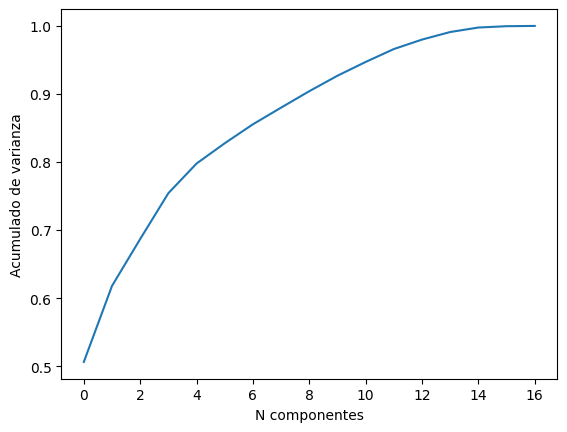

In [ ]:
# **d. Cuanta varianza corresponde a cada componente**
plt.plot(np.cumsum(ar_varianza))
plt.xlabel('N componentes')
plt.ylabel('Acumulado de varianza')
plt.show()

In [ ]:
np.cumsum(ar_varianza)

array([0.50635074, 0.61803087, 0.68695236, 0.75426947, 0.79780678,
       0.82760365, 0.85547247, 0.87996955, 0.90410194, 0.92682776,
       0.94706799, 0.96601702, 0.97994688, 0.99104427, 0.99763412,
       0.999594  , 1.        ])

In [ ]:
mod_pca = PCA(5)
pca_value_trans = mod_pca.fit_transform(trans_scal)
pca_value_trans

array([[ 1.1961395 ,  0.23869731, -0.29824646,  0.01306532,  0.28800717],
       [-0.90985153, -0.1315248 ,  0.26721704, -0.01367678, -0.36514076],
       [ 0.77338864, -0.0978293 , -0.05132463, -0.28986961,  0.10342727],
       ...,
       [ 0.65994171, -0.18387953,  0.00554263,  0.3994982 ,  0.40468804],
       [ 0.81137281,  0.0130608 ,  0.09830201, -0.39433341, -0.29129457],
       [-0.5552933 ,  0.26745349,  0.14918512, -0.03150704, -0.23004103]])

In [ ]:
sum (mod_pca.explained_variance_ratio_)

0.7978067800987215

In [ ]:
df_comp = pd.DataFrame(pca_value_trans, columns=['PC1','PC2','PC3','PC4','PC5'])
df_comp

,PC1,PC2,PC3,PC4,PC5
0,1.196140,0.238697,-0.298246,0.013065,0.288007
1,-0.909852,-0.131525,0.267217,-0.013677,-0.365141
2,0.773389,-0.097829,-0.051325,-0.289870,0.103427
3,-0.696627,-0.209597,-0.154306,-0.277561,0.046010
4,0.289132,0.193792,-0.504279,0.356537,-0.205491
...,...,...,...,...,...
2235,0.849664,0.232365,-0.233031,-0.096068,0.181311
2236,-0.524089,1.179236,0.543531,0.234687,-0.426324
2237,0.659942,-0.183880,0.005543,0.399498,0.404688
2238,0.811373,0.013061,0.098302,-0.394333,-0.291295


# **224. Parte IV Ejemplo 1. Cluster - Análisis Exploratorio de Datos**

# **a. Usaremos el método del codo para saber cuantos cluster nos vamos a quedar**

In [ ]:
from sklearn.cluster import KMeans

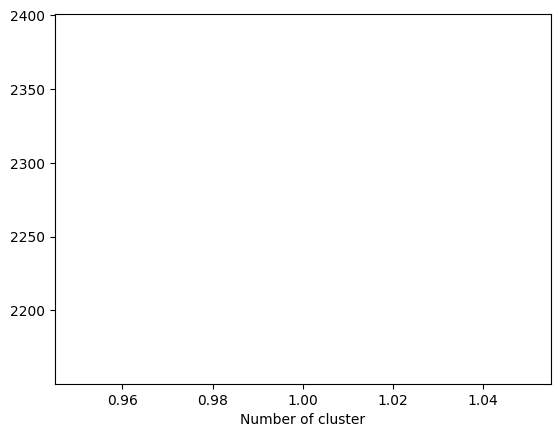

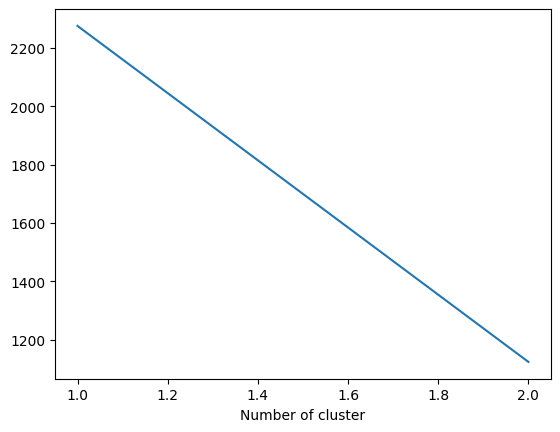

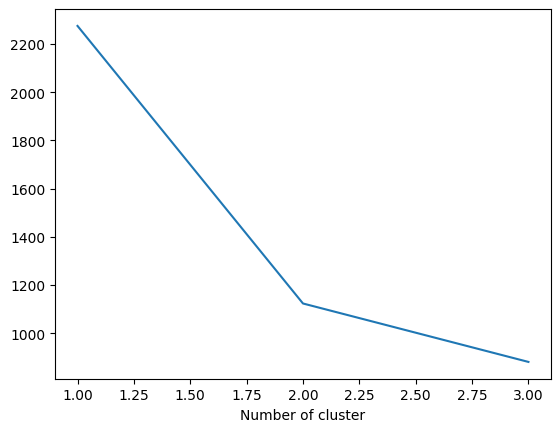

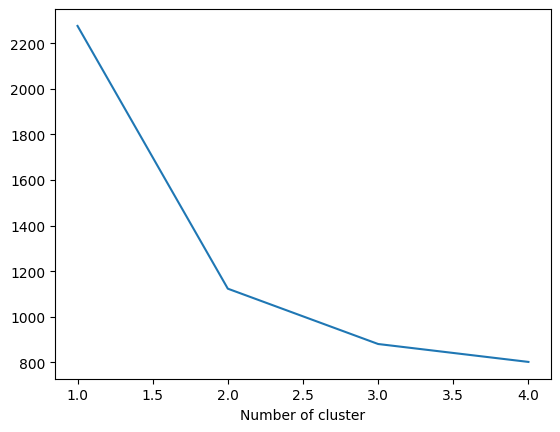

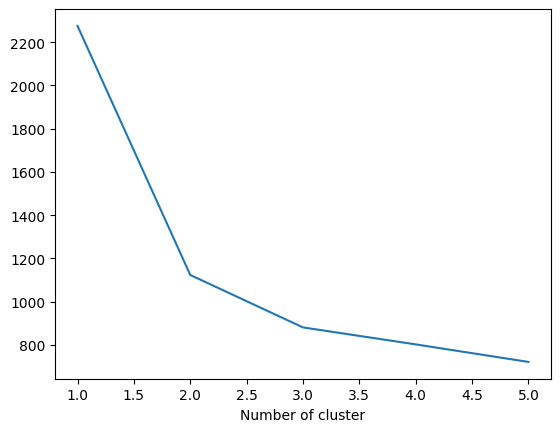

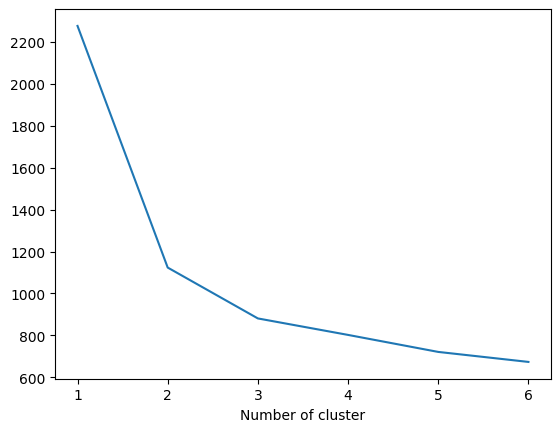

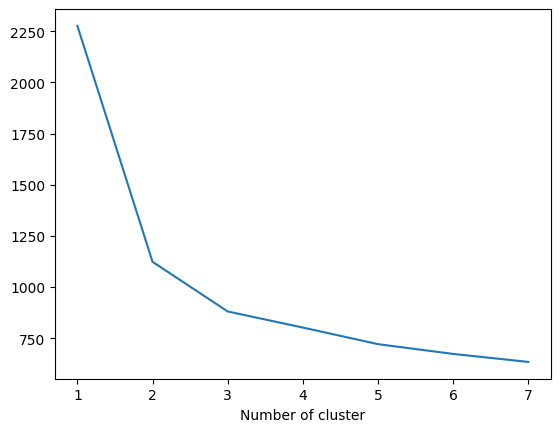

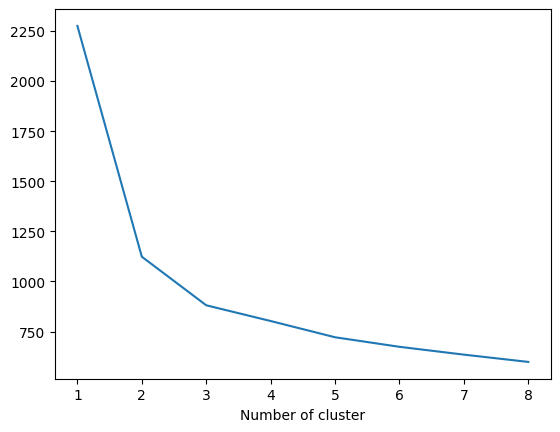

In [ ]:
sse = {} # creamos un bucle me extraiga la inercia que es la suma de los errores al cuadrado
for k in range(1,9):
  kmeans = KMeans(n_clusters = k, max_iter = 200, n_init = 2).fit(pca_value_trans)
  sse[k] = kmeans.inertia_ # inertia: suma de distancias de muestras de sus slosets cluster center
  plt.figure()
  plt.plot(list(sse.keys()),list(sse.values()))
  plt.xlabel('Number of cluster')
  plt.show

# **b. Otro método para saber el número de cluster es usar el _silhouette_score_ - En Barras**

+ Entre mas alto sea el score, mejor separacion abrá

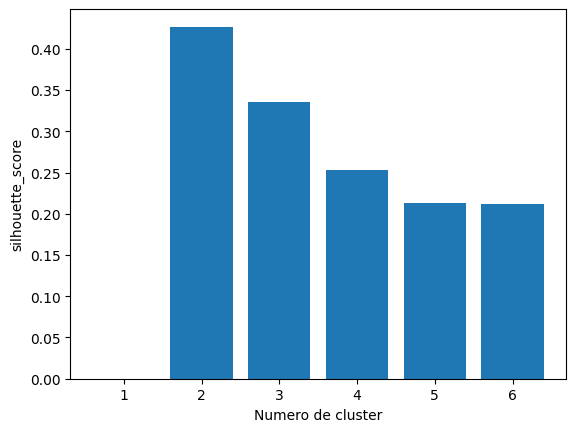

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = [0] # se crea una lista para almacenar

for n_clusters in range (2,7): # bucle recorre
  silhouette_scores.append(
      silhouette_score(pca_value_trans,KMeans(n_clusters=n_clusters).fit_predict(pca_value_trans))
  )
k = [1,2,3,4,5,6]
plt.bar(k,silhouette_scores)
plt.xlabel('Numero de cluster', fontsize = 10)
plt.ylabel('silhouette_score', fontsize = 10)
plt.show()

# **c. Otro método para saber el número de cluster es usar el _silhouette_score_ - En Lineas**

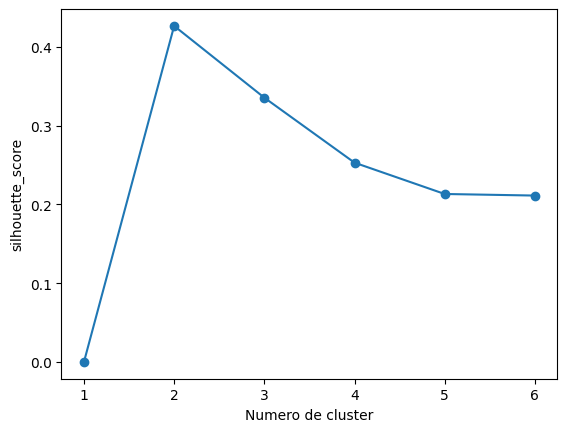

In [ ]:
plt.plot(k,silhouette_scores, marker = 'o')
plt.xlabel('Numero de cluster', fontsize = 10)
plt.ylabel('silhouette_score', fontsize = 10)
plt.show()

# **d. Con cuantos cluster nos debemos quedar**
+ Los métodos nos dicen que 2 o 3 o 4
+ Todo depende del investigador

In [ ]:
kmean_kpi = KMeans(n_clusters=3,random_state=43)
kmean_kpi.fit(pca_value_trans)

KMeans(n_clusters=3, random_state=43)

In [ ]:
df_comp['cluster']=kmean_kpi.labels_
datos_train_mod['cluster']=kmean_kpi.labels_

In [ ]:
df_comp['cluster'].value_counts()/len(df_comp) # Porcentaje de cada cluster

1    0.420089
2    0.316964
0    0.262946
Name: cluster, dtype: float64

# **e. Graficamos nuestros cluster en 2D**

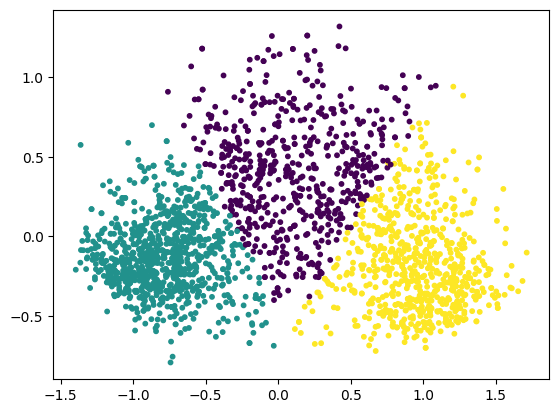

In [ ]:
# **Usando PC1 y PC2**
plt.scatter(df_comp['PC1'],df_comp['PC2'] , c=df_comp['cluster'],s=10)

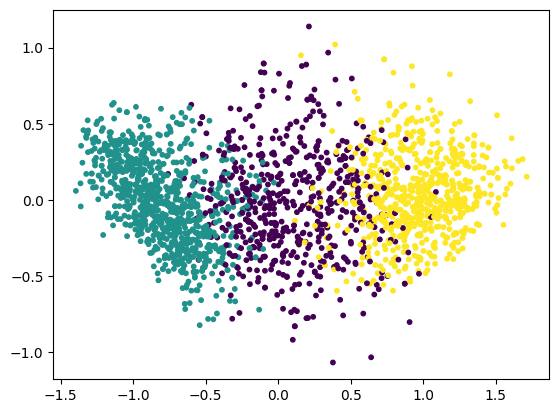

In [ ]:
# **Usando PC1 y PC3**
plt.scatter(df_comp['PC1'],df_comp['PC3'] , c=df_comp['cluster'],s=10)

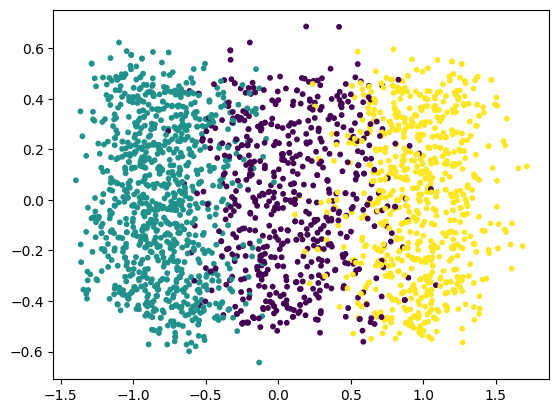

In [ ]:
# **Usando PC1 y PC4**
plt.scatter(df_comp['PC1'],df_comp['PC4'] , c=df_comp['cluster'],s=10)

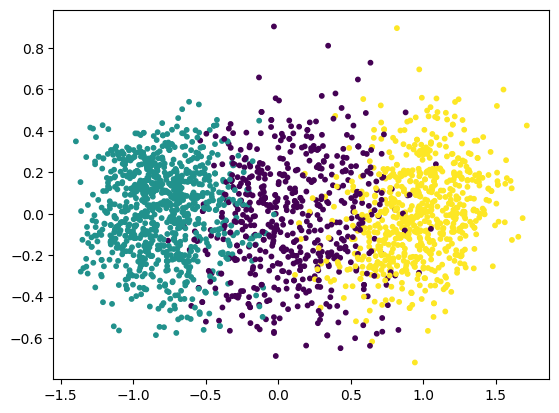

In [ ]:
# **Usando PC1 y PC5**
plt.scatter(df_comp['PC1'],df_comp['PC5'] , c=df_comp['cluster'],s=10)

# **f. Graficamos nuestros cluster en 3D**

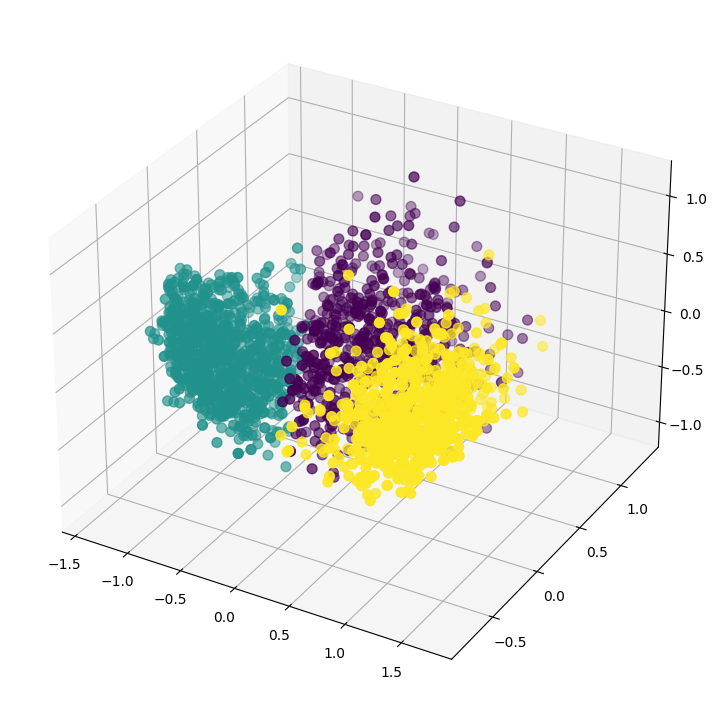

In [ ]:
# **Usando PC1 PC2 y PC3**
fig = plt.figure(figsize = (15,9))
ax = fig.add_subplot(projection = '3d')
ax.scatter(df_comp['PC1'],df_comp['PC2'] ,df_comp['PC3'], c=df_comp['cluster'],s=50)

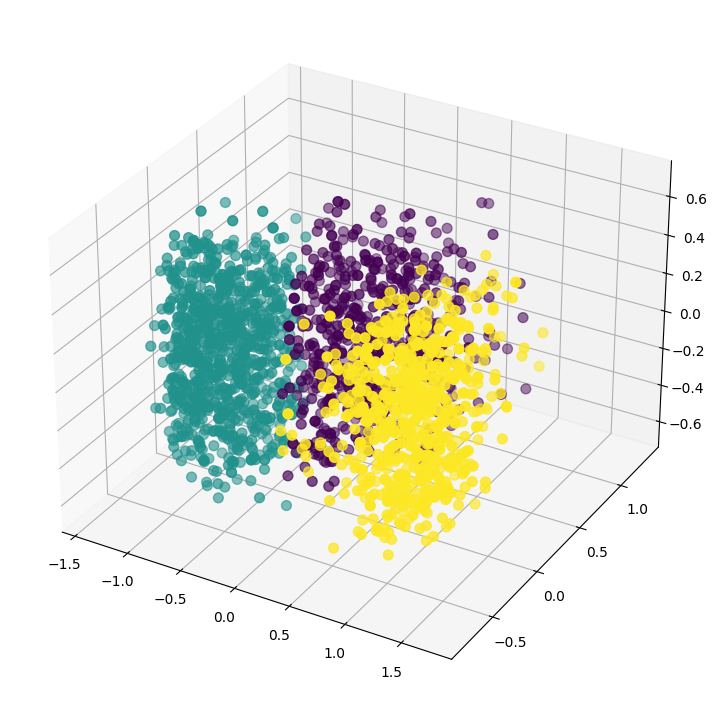

In [ ]:
# **Usando PC1 PC2 y PC4**
fig = plt.figure(figsize = (15,9))
ax = fig.add_subplot(projection = '3d')
ax.scatter(df_comp['PC1'],df_comp['PC2'] ,df_comp['PC4'], c=df_comp['cluster'],s=50)

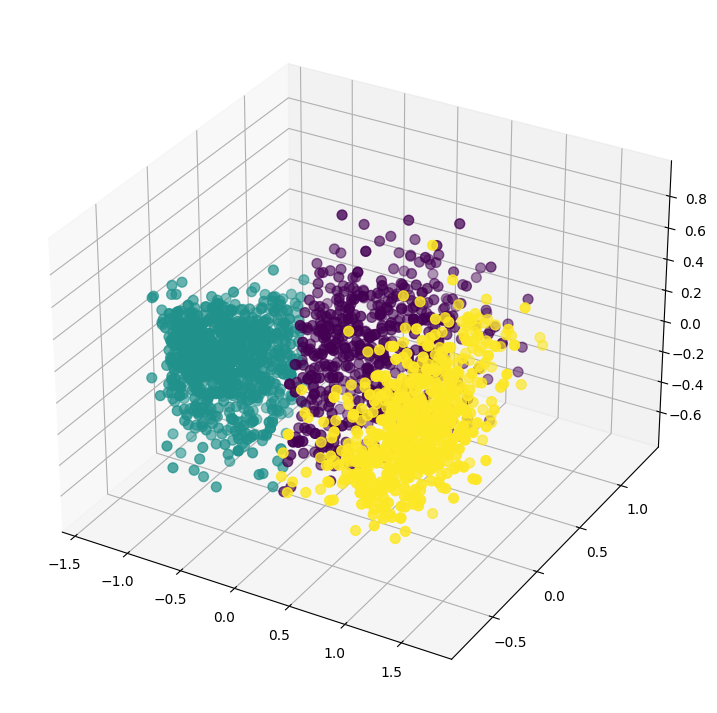

In [ ]:
# **Usando PC1 PC2 y PC5**
fig = plt.figure(figsize = (15,9))
ax = fig.add_subplot(projection = '3d')
ax.scatter(df_comp['PC1'],df_comp['PC2'] ,df_comp['PC5'], c=df_comp['cluster'],s=50)

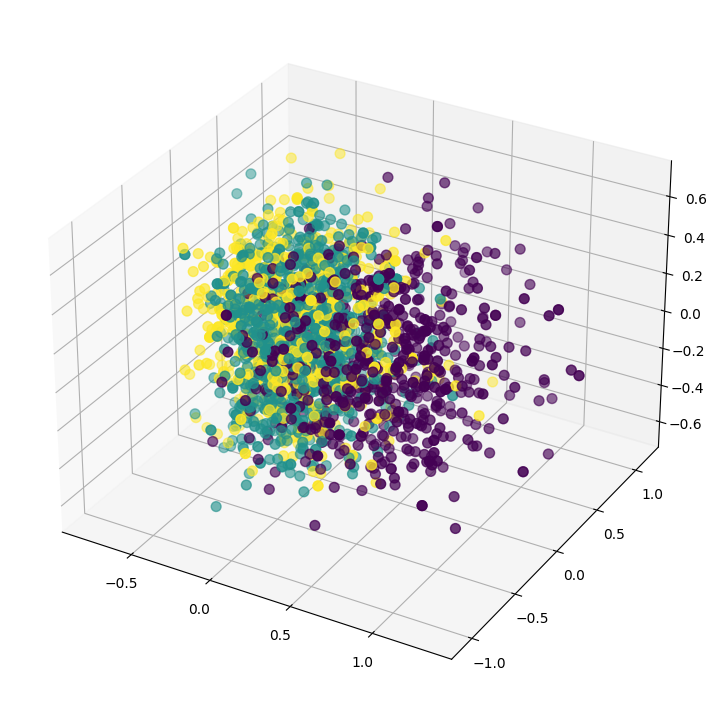

In [ ]:
# **Usando PC2 PC3 y PC4**
fig = plt.figure(figsize = (15,9))
ax = fig.add_subplot(projection = '3d')
ax.scatter(df_comp['PC2'],df_comp['PC3'] ,df_comp['PC4'], c=df_comp['cluster'],s=50)

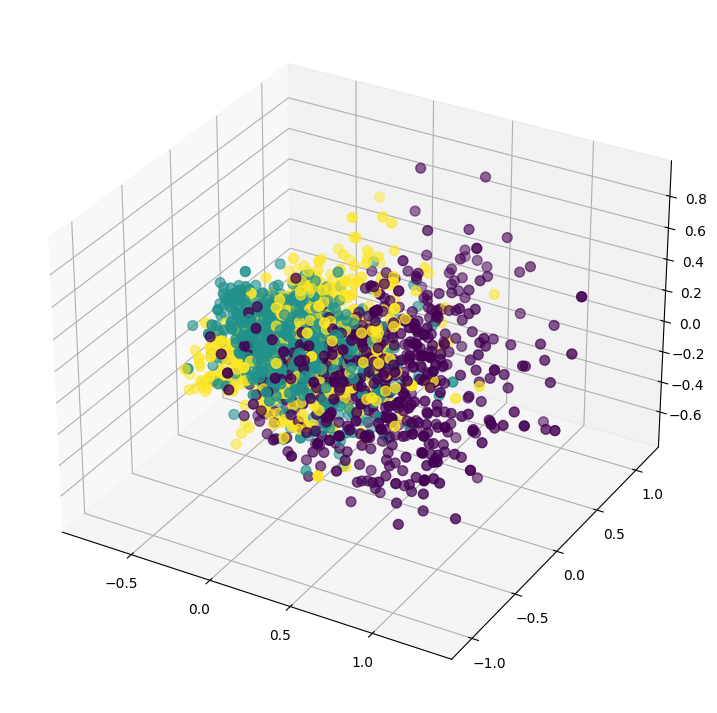

In [ ]:
# **Usando PC2 PC3 y PC5**
fig = plt.figure(figsize = (15,9))
ax = fig.add_subplot(projection = '3d')
ax.scatter(df_comp['PC2'],df_comp['PC3'] ,df_comp['PC5'], c=df_comp['cluster'],s=50)

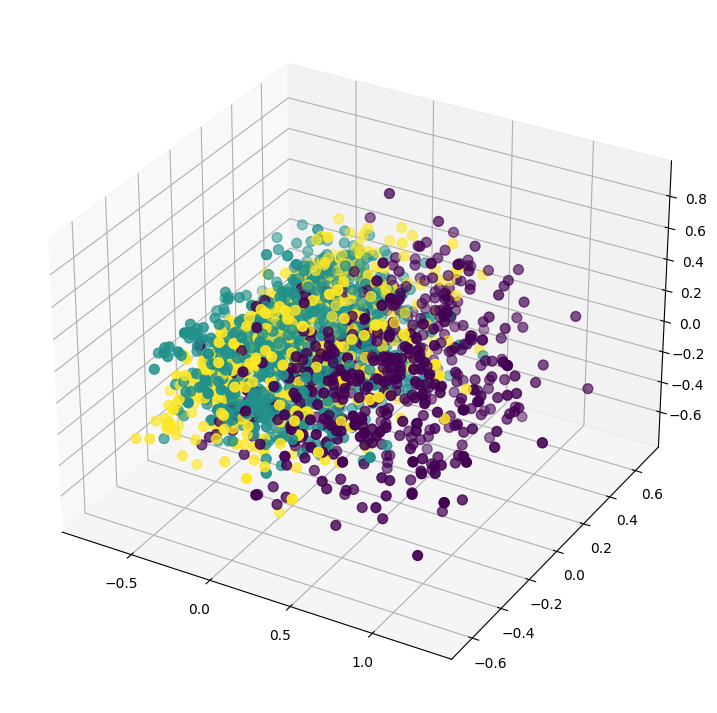

In [ ]:
# **Usando PC2 PC4 y PC5**
fig = plt.figure(figsize = (15,9))
ax = fig.add_subplot(projection = '3d')
ax.scatter(df_comp['PC2'],df_comp['PC4'] ,df_comp['PC5'], c=df_comp['cluster'],s=50)